In [115]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Obteniendo data de la Wiki de Genshin Impact

In [116]:
charactersUrl = 'https://genshin-impact.fandom.com/wiki/Character'
charactersUrlStats = 'https://genshin-impact.fandom.com/wiki/Character/Comparison'
characters = pd.read_html(charactersUrl)
charactersStats = pd.read_html(charactersUrlStats)
df1 = characters[1]
df2 = charactersStats[0]
df2

,Icon,Name,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
0,NaN,Albedo,13225,251,876,Geo DMG Bonus,28.8%
1,NaN,Alhaitham,13348,313,781,Dendro DMG Bonus,28.8%
2,NaN,Aloy,10898,233,676,Cryo DMG Bonus,28.8%
3,NaN,Amber,9461,223,600,ATK,24.0%
4,NaN,Arataki Itto,12858,227,959,CRIT Rate,19.2%
...,...,...,...,...,...,...,...
68,NaN,Yaoyao,12288,212,750,HP,24.0%
69,NaN,Yelan,14450,243,547,CRIT Rate,19.2%
70,NaN,Yoimiya,10164,322,614,CRIT Rate,19.2%
71,NaN,Yun Jin,10657,191,734,Energy Recharge,26.8%


Dropeando columnas con valores NaN

In [117]:
df3 = df1.drop(['Icon', 'Quality', 'Model Type'], axis = 1)
df4 = df2.drop(['Icon'], axis = 1)
df4

,Name,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
0,Albedo,13225,251,876,Geo DMG Bonus,28.8%
1,Alhaitham,13348,313,781,Dendro DMG Bonus,28.8%
2,Aloy,10898,233,676,Cryo DMG Bonus,28.8%
3,Amber,9461,223,600,ATK,24.0%
4,Arataki Itto,12858,227,959,CRIT Rate,19.2%
...,...,...,...,...,...,...
68,Yaoyao,12288,212,750,HP,24.0%
69,Yelan,14450,243,547,CRIT Rate,19.2%
70,Yoimiya,10164,322,614,CRIT Rate,19.2%
71,Yun Jin,10657,191,734,Energy Recharge,26.8%


Uniendo los dos Datasets con la key Name y guardandolo en df5

In [118]:
df5 = df3.merge(df4, on = 'Name')
df5

,Name,Element,Weapon,Region,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
0,Albedo,Geo,Sword,Mondstadt,13225,251,876,Geo DMG Bonus,28.8%
1,Alhaitham,Dendro,Sword,Sumeru,13348,313,781,Dendro DMG Bonus,28.8%
2,Aloy,Cryo,Bow,NaN,10898,233,676,Cryo DMG Bonus,28.8%
3,Amber,Pyro,Bow,Mondstadt,9461,223,600,ATK,24.0%
4,Arataki Itto,Geo,Claymore,Inazuma,12858,227,959,CRIT Rate,19.2%
...,...,...,...,...,...,...,...,...,...
68,Yaoyao,Dendro,Polearm,Liyue,12288,212,750,HP,24.0%
69,Yelan,Hydro,Bow,Liyue,14450,243,547,CRIT Rate,19.2%
70,Yoimiya,Pyro,Bow,Inazuma,10164,322,614,CRIT Rate,19.2%
71,Yun Jin,Geo,Polearm,Liyue,10657,191,734,Energy Recharge,26.8%


Dropeando otra columna no relevante

In [119]:
df5 = df5.drop(['Ascension Stat Value'], axis = 1)
df5

,Name,Element,Weapon,Region,HP,ATK,DEF,Ascension Stat
0,Albedo,Geo,Sword,Mondstadt,13225,251,876,Geo DMG Bonus
1,Alhaitham,Dendro,Sword,Sumeru,13348,313,781,Dendro DMG Bonus
2,Aloy,Cryo,Bow,NaN,10898,233,676,Cryo DMG Bonus
3,Amber,Pyro,Bow,Mondstadt,9461,223,600,ATK
4,Arataki Itto,Geo,Claymore,Inazuma,12858,227,959,CRIT Rate
...,...,...,...,...,...,...,...,...
68,Yaoyao,Dendro,Polearm,Liyue,12288,212,750,HP
69,Yelan,Hydro,Bow,Liyue,14450,243,547,CRIT Rate
70,Yoimiya,Pyro,Bow,Inazuma,10164,322,614,CRIT Rate
71,Yun Jin,Geo,Polearm,Liyue,10657,191,734,Energy Recharge


In [120]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            73 non-null     object
 1   Element         72 non-null     object
 2   Weapon          73 non-null     object
 3   Region          71 non-null     object
 4   HP              73 non-null     int64 
 5   ATK             73 non-null     int64 
 6   DEF             73 non-null     int64 
 7   Ascension Stat  73 non-null     object
dtypes: int64(3), object(5)
memory usage: 4.7+ KB


Primer grafico solo con los valores numericos del dataset

c:\Users\julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


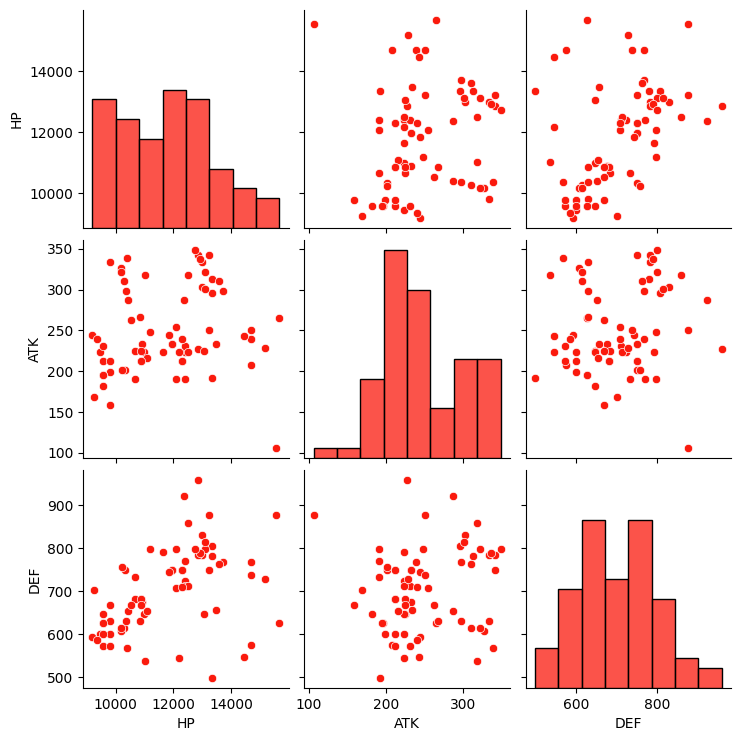

In [121]:
sns.pairplot(df5)

Creando paleta de colores para que se relacione con los elementos del juego y haciendo grafico segun cantidad de personajes por tipo de elemento

<Axes: xlabel='Element', ylabel='count'>

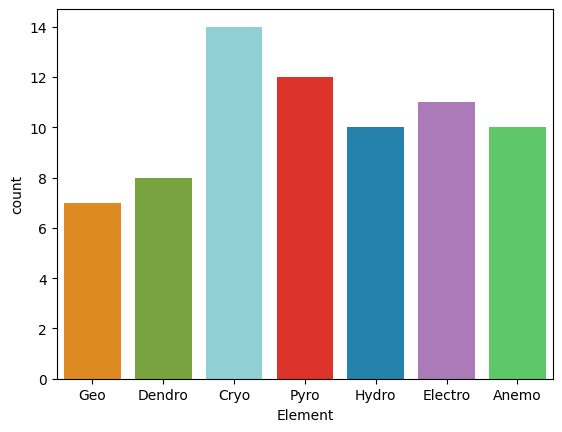

In [122]:
paletaColoresElementos = {"Pyro": "#FA1A0D", "Hydro": "#0D8BC4", "Geo": "#FD8D04", "Anemo": "#4CD95A", "Electro" : "#B071C1", "Cryo": "#85D8DF", "Dendro": "#7bb42d"}
sns.set_palette(sns.color_palette(paletaColoresElementos.values()))

sns.countplot(
    x='Element',
    data=df5,
    palette= paletaColoresElementos
)

Creando visual conteo de diferentes armas

<Axes: xlabel='Weapon', ylabel='count'>

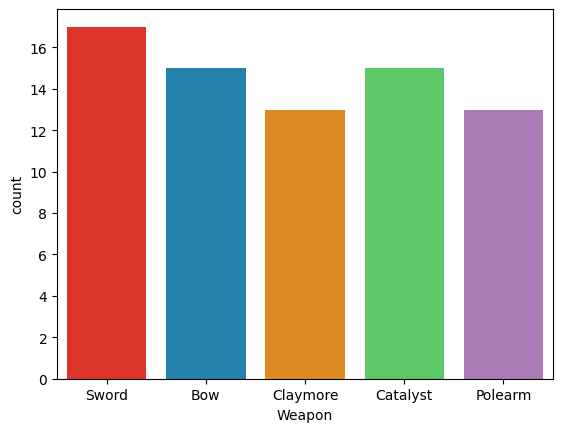

In [123]:
sns.countplot(
    x='Weapon',
    data=df5,
)

Conteo de personajes segun region

<Axes: xlabel='Region', ylabel='count'>

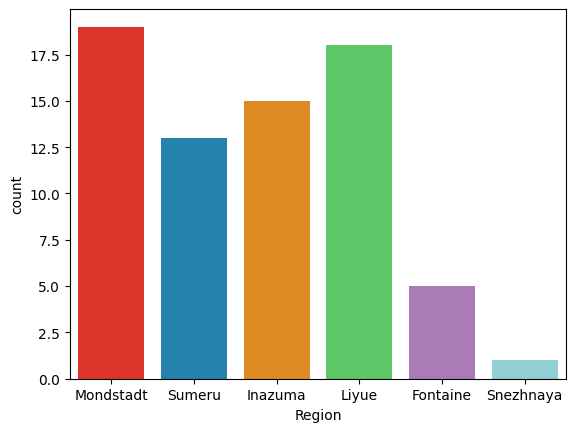

In [124]:
sns.countplot(
    x='Region',
    data=df5
)

Scatter segun ATK/DEF, con tamanio segun la vida total, separado por regiones y colorizado por elemento.

c:\Users\julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


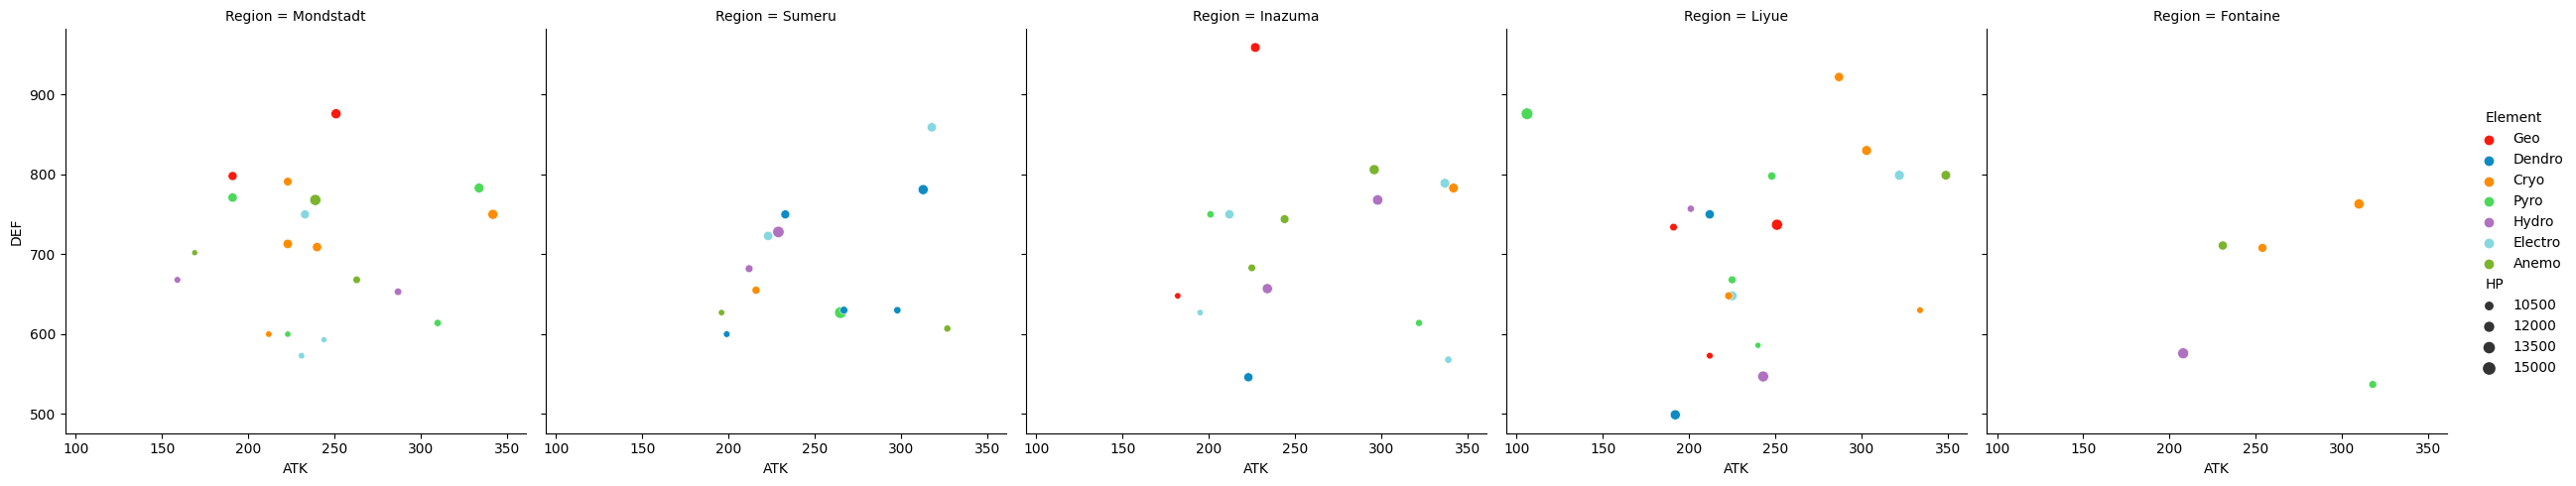

In [125]:
sns.relplot(
    data=df5[df5['Region'] != 'Snezhnaya'],
    x='ATK',
    y='DEF',
    col='Region',
    hue='Element',
    kind='scatter',
    size='HP',
)

Scatter para ver si existe alguna correlacion entre los atributos ATK-DEF-HP, segun region

<Axes: xlabel='ATK', ylabel='DEF'>

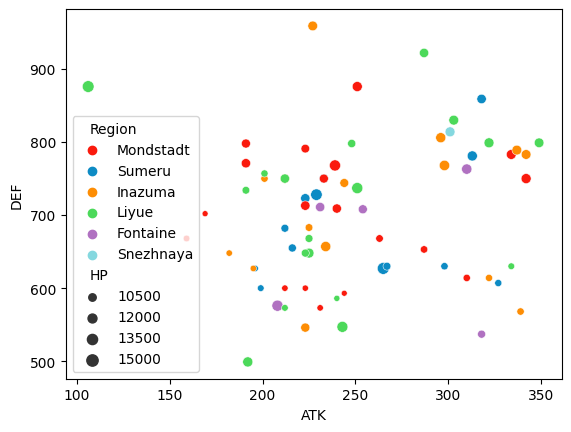

In [126]:
sns.scatterplot(
    data=df5,
    x='ATK',
    y='DEF',
    size='HP',
    hue='Region',
)

Scatter para ver si existe alguna correlacion entre los atributos ATK-DEF-HP, segun Armas

<Axes: xlabel='HP', ylabel='DEF'>

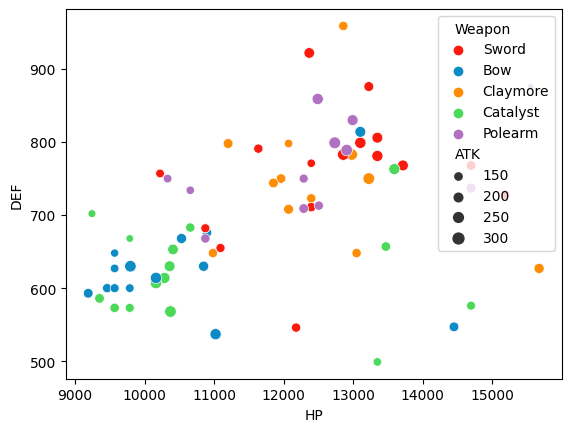

In [127]:
sns.scatterplot(
    data=df5,
    x='HP',
    y='DEF',
    size='ATK',
    hue='Weapon',
)

Cantidad de ATK segun elemento

<Axes: xlabel='Element', ylabel='ATK'>

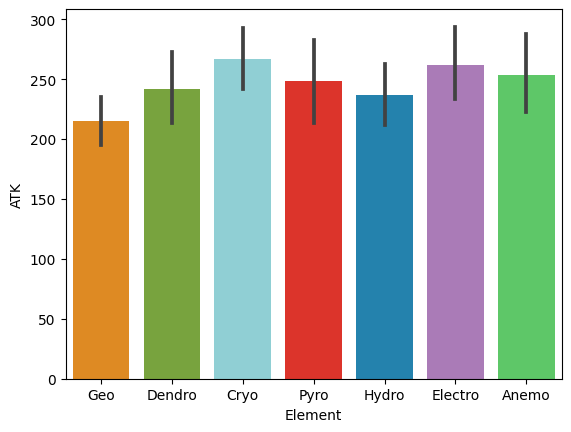

In [128]:
sns.barplot(
    data=df5,
    x='Element',
    y='ATK',
    palette= paletaColoresElementos
)


Cantidad de ATK segun Arma

<Axes: xlabel='Weapon', ylabel='ATK'>

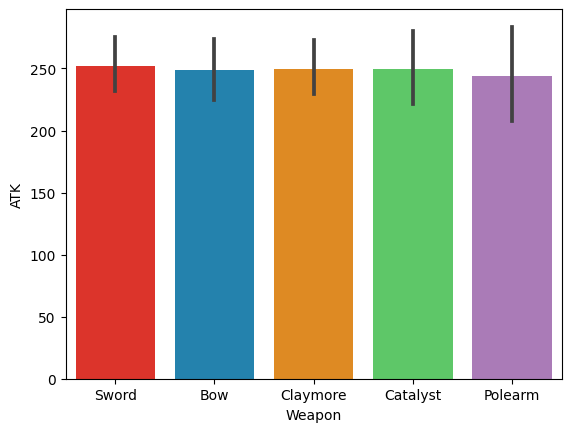

In [129]:
sns.barplot(
    data=df5,
    x='Weapon',
    y='ATK',
)

Cantidad de ATK segun Elemento y Region

c:\Users\julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


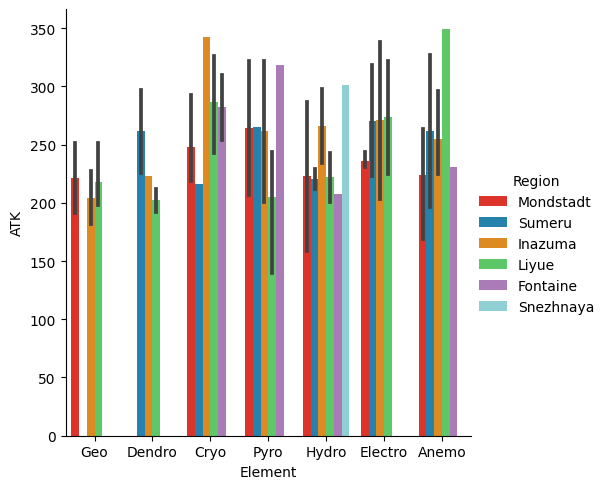

In [130]:
sns.catplot(
    data=df5,
    x='Element',
    y='ATK',
    hue='Region',
    kind='bar'
)

Top 5 personajes con mayor ATK, segun su region

<Axes: xlabel='Name', ylabel='ATK'>

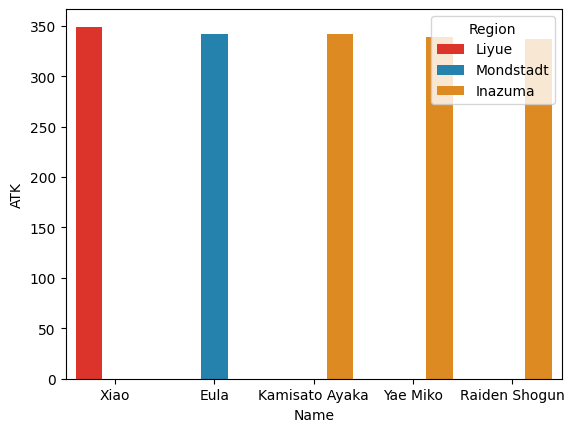

In [131]:
sns.barplot(
    data=df5.nlargest(5, 'ATK'),
    x='Name',
    y='ATK',
    hue='Region'
)

Top 5 Personajes con mayor defensa, segun region

<Axes: xlabel='Name', ylabel='DEF'>

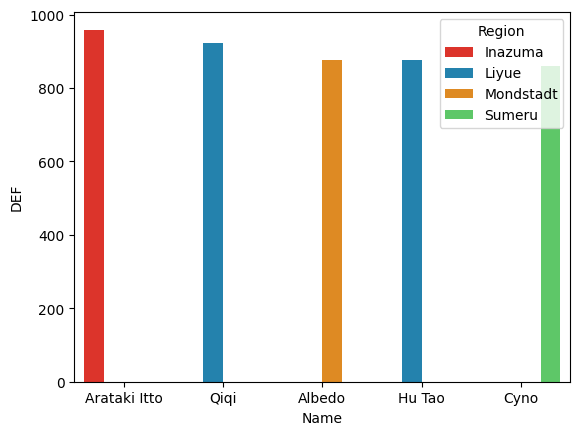

In [132]:
sns.barplot(
    data=df5.nlargest(5, 'DEF'),
    x='Name',
    y='DEF',
    hue='Region'
)

Top 5 de personajes con mayor HP, segun Region

<Axes: xlabel='Name', ylabel='HP'>

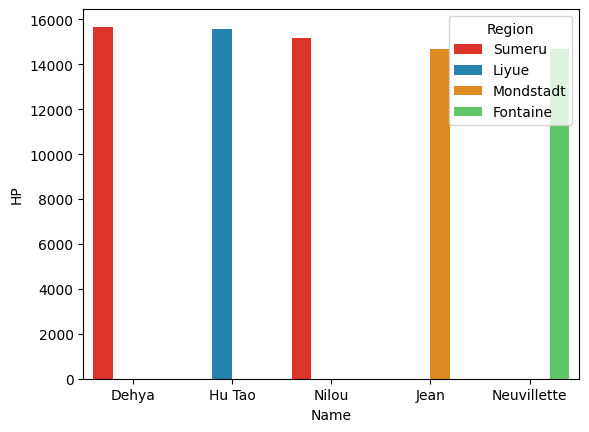

In [133]:
sns.barplot(
    data=df5.nlargest(5, 'HP'),
    x='Name',
    y='HP',
    hue='Region'
)

Contrario a lo pensado, los personajes Geo no son los primeros en el rank de defensa a pesar de que son los que mas necesitan esta estadistica

<Axes: xlabel='Name', ylabel='DEF'>

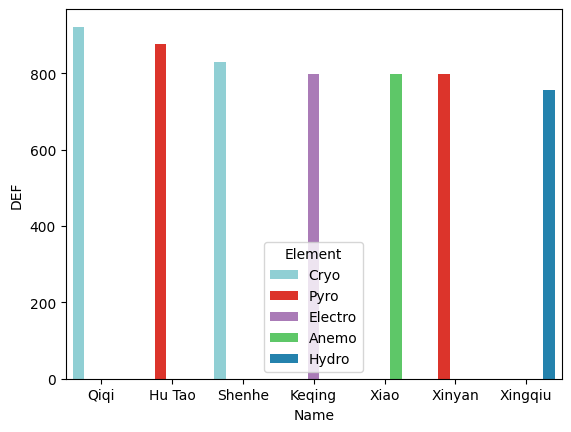

In [134]:
sns.barplot(
    data=df5[df5['Region'] == 'Liyue'].nlargest(7, 'DEF'),
    x='Name',
    y='DEF',
    hue='Element',
    palette= paletaColoresElementos
)